# OneR

## Carregando Biblioteca

In [2]:
library(repr)
library(caTools)
options(repr.plot.width = 4, repr.plot.height = 4)
# OneR
library(OneR)
#Preprocessamento
library(CatEncoders)
library(gplots)
#Matricas
library(caret)

## Carregando os dados

In [4]:
df <- read.csv("../datasets/titanic/train.csv", na.strings = '')
head(df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,NA,Q


## Pré-Processamento de Dados

In [5]:
# Extração de Pronomes
df$Name <- ifelse(grepl(", Mr. ", df$Name), 'Mr', as.character(df$Name))
df$Name <- ifelse(grepl("Capt", df$Name), 'Tripulacao', as.character(df$Name))
df$Name <- ifelse(grepl("Don", df$Name), 'Mr', as.character(df$Name))
df$Name <- ifelse(grepl("Major", df$Name), 'Tripulacao', as.character(df$Name))
df$Name <- ifelse(grepl("Col", df$Name), 'Tripulacao', as.character(df$Name))
df$Name <- ifelse(grepl("Dr", df$Name), 'Dr', as.character(df$Name))
df$Name <- ifelse(grepl("Rev", df$Name), 'Rev', as.character(df$Name))
df$Name <- ifelse(grepl("Sir", df$Name), 'Mr', as.character(df$Name))
df$Name <- ifelse(grepl("Jonkheer", df$Name), 'Mr', as.character(df$Name))
df$Name <- ifelse(grepl("Dona", df$Name), 'Mrs', as.character(df$Name))
df$Name <- ifelse(grepl("Countess", df$Name), 'Mrs', as.character(df$Name))
df$Name <- ifelse(grepl("Mme", df$Name), 'Mrs', as.character(df$Name))
df$Name <- ifelse(grepl("Lady", df$Name), 'Mrs', as.character(df$Name))
df$Name <- ifelse(grepl("Mrs", df$Name), 'Mrs', as.character(df$Name))
df$Name <- ifelse(grepl("Mlle", df$Name), 'Miss', as.character(df$Name))
df$Name <- ifelse(grepl("Ms", df$Name), 'Miss', as.character(df$Name))
df$Name <- ifelse(grepl("Miss", df$Name), 'Miss', as.character(df$Name))
df$Name <- ifelse(grepl("Master", df$Name), 'Master', as.character(df$Name))

# Categóricas para Numéricas
le_name <- LabelEncoder.fit(unique(df$Name))
df$Name <- transform(le_name, df$Name)

# Substituir valores ausentes/nulos
media <- mean(df$Age, na.rm = TRUE)
df$Age <- ifelse(is.na(df$Age), media, df$Age)

t <- table(df$Embarked)
moda <- names(t[t == max(t)])

df$Embarked <- ifelse(is.na(df$Embarked), as.character(moda), as.character(df$Embarked) )

# Categórico Para numérico
le_sex <- LabelEncoder.fit(unique(df$Sex))
df$Sex <- transform(le_sex, df$Sex)

le_embarked <- LabelEncoder.fit(unique(df$Embarked))
df$Embarked <- transform(le_embarked, df$Embarked)

# Remoção de colunas
df$PassengerId <- NULL
df$Ticket <- NULL
df$Cabin <- NULL

#Escalonamento 
df[, c('Age', 'Fare')] <- scale(df[, c('Age', 'Fare')])

df$Name = factor(df$Name)
df$Pclass = factor(df$Pclass)
df$Sex = factor(df$Sex)
df$Embarked = factor(df$Embarked)

head(df)
str(df)

Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,4,2,-0.5921480,1,0,-0.5021631,3
1,1,5,1,0.6384304,1,0,0.7864036,1
1,3,3,1,-0.2845034,0,0,-0.4885799,3
1,1,5,1,0.4076970,1,0,0.4204941,3
0,3,4,2,0.4076970,0,0,-0.4860644,3
0,3,4,2,0.0000000,0,0,-0.4778481,2


'data.frame':	891 obs. of  9 variables:
 $ Survived: int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass  : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Name    : Factor w/ 7 levels "1","2","3","4",..: 4 5 3 5 4 4 4 2 5 5 ...
 $ Sex     : Factor w/ 2 levels "1","2": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num  -0.592 0.638 -0.285 0.408 0.408 ...
 $ SibSp   : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num  -0.502 0.786 -0.489 0.42 -0.486 ...
 $ Embarked: Factor w/ 3 levels "1","2","3": 3 1 3 3 3 2 3 3 3 1 ...


# Divisão dos dados em treino e teste

In [6]:
set.seed(0)
divisao <- sample.split(df$Survived, SplitRatio = 0.75)

treino <- subset(df, divisao == TRUE)
teste <-  subset(df, divisao == FALSE)

x_train <- treino[,-1]
y_train <- treino$Survived

x_test <- teste[,-1]
y_test <- teste$Survived

## OneR

Argumentos

- **x** - Quadro de dados com a última coluna contendo a variável de destino.
- **...** - Argumentos passados para ou de outros métodos.
- **formula** - Fórmula, além disso, os dados do argumento são necessários.
- **data** - Quadro de dados que contém os dados, necessário apenas ao usar a interface de fórmula.
- **ties.method** - Cadeia de caracteres especificando como os empates são tratados, consulte 'Detalhes'; pode ser abreviado.
- **verbose** - Se TRUE imprime classificação, nomes e precisão preditiva dos atributos em ordem decrescente (com empates.metodo = "primeiro"). 

In [8]:
x <- cbind(x_train, y_train)

classificador <- OneR(y_train ~., data = x, verbose = TRUE)

Warning message in OneR.data.frame(x = data, ties.method = ties.method, verbose = verbose, :
"data contains unused factor levels"


    Attribute Accuracy
1 * Name      80.24%  
2   Sex       80.09%  
3   Pclass    67.37%  
4   Fare      64.37%  
5   Embarked  63.47%  
6   Age       62.28%  
7   Parch     61.83%  
8   SibSp     61.68%  
---
Chosen attribute due to accuracy
and ties method (if applicable): '*'



# Regras

- **apriori** retorna a quantidade treinada por classe
- **isnumeric** reorna um vertor onde indica se o atriburo é numérico ou não. 
- **levels** retorna as classes
- **tables** retorna a probabilidade por cada atributo

In [10]:
print(classificador)


Call:
OneR.formula(formula = y_train ~ ., data = x, verbose = TRUE)

Rules:
If Name = 1 then y_train = 1
If Name = 2 then y_train = 1
If Name = 3 then y_train = 1
If Name = 4 then y_train = 0
If Name = 5 then y_train = 1
If Name = 6 then y_train = 0
If Name = 7 then y_train = 0

Accuracy:
536 of 668 instances classified correctly (80.24%)



In [11]:
classificador$cont_table

       Name
y_train   1   2   3   4   5   6   7
      0   3  12  34 336  20   5   2
      1   4  15  94  61  80   0   2

# Prever um valor

In [12]:
Pclass <- 1
Name <- 'Miss'
Sex <- 'female'
Age <- 5
SibSp <- 1
Parch <- 1
Fare <- 500
Embarked <- 'C'

data = data.frame(Pclass, Name, Sex, Age, SibSp, Parch, Fare, Embarked)

#Tratando os Dados
# Categóricas para Numéricas

data$Name <- transform(le_name, as.character(data$Name))
data$Sex  <- transform(le_sex, (data$Sex))
data$Embarked <- transform(le_embarked, as.character(data$Embarked))

data$Name = factor(data$Name)
data$Pclass = factor(data$Pclass)
data$Sex = factor(data$Sex)
data$Embarked = factor(data$Embarked)

data[, c('Age', 'Fare')] <- scale(data[, c('Age', 'Fare')])

#Classificando
previsao = predict(classificador, newdata = data, type = 'class')
previsao

3 
1 
Levels: 1

## Prever os dados de Teste

In [13]:
previsao = predict(classificador, newdata = x_test)

acuracia = 100 * sum(previsao == y_test)/length(y_test)

acuracia

[1] 74.88789

# Matriz de Confusão

- A função **table** realiza o agrupamento dos dados
- A função **confusionMatriz** da biblioteca **caret** também calcula a matriz de confusão + as métricas

In [14]:
matriz_confusao = table(y_test, previsao)
matriz_confusao

      previsao
y_test   0   1
     0 104  33
     1  23  63

In [15]:
matriz = confusionMatrix(factor(previsao), factor(y_test))
matriz

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 104  23
         1  33  63
                                          
               Accuracy : 0.7489          
                 95% CI : (0.6866, 0.8044)
    No Information Rate : 0.6143          
    P-Value [Acc > NIR] : 1.507e-05       
                                          
                  Kappa : 0.4813          
                                          
 Mcnemar's Test P-Value : 0.2291          
                                          
            Sensitivity : 0.7591          
            Specificity : 0.7326          
         Pos Pred Value : 0.8189          
         Neg Pred Value : 0.6562          
             Prevalence : 0.6143          
         Detection Rate : 0.4664          
   Detection Prevalence : 0.5695          
      Balanced Accuracy : 0.7458          
                                          
       'Positive' Class : 0               
                              

## Personalizando a Matriz de Confusão

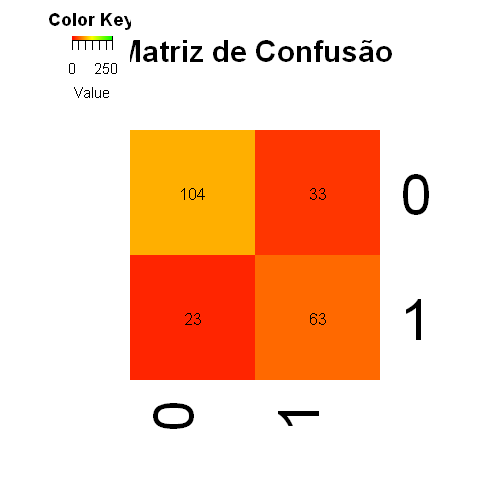

In [16]:
my_palette <- colorRampPalette(c("red", "yellow", "green"))

col_breaks = c(0:50, 51:100, 101:300)

heatmap.2(matriz_confusao,
    Rowv = 'NA',
    cellnote = matriz_confusao, 
    main = "Matriz de Confusão",
    notecol="black",      
    density.info="none",  
    trace="none",        
    col=my_palette,       
    breaks=col_breaks,   
    dendrogram= 'none',     
    Colv="NA" 
)

# Métricas

- **Precisão** que é a fração de instâncias recuperadas que são relevantes, 
- **Recall** - que é a fração de instâncias relevantes que são recuperadas 
- **f-score** - é 2 * precisão * recall / (precisão + recall) é 

In [17]:
precision(factor(previsao), factor(y_test))
'Morto'
precision(factor(previsao), factor(y_test), relevant = 2)
'Vivo'
precision(factor(previsao), factor(y_test), relevant = 1)

[1] 0.8188976

[1] "Morto"

[1] 0.65625

[1] "Vivo"

[1] 0.8188976

In [18]:
recall(factor(previsao), factor(y_test))
'Morto'
recall(factor(previsao), factor(y_test), relevant = 2)
'Vivo'
recall(factor(previsao), factor(y_test), relevant = 1)

[1] 0.7591241

[1] "Morto"

[1] 0.7325581

[1] "Vivo"

[1] 0.7591241

In [19]:
F_meas(factor(previsao), factor(y_test))
'Morto'
F_meas(factor(previsao), factor(y_test), relevant = 2)
'Vivo'
F_meas(factor(previsao), factor(y_test), relevant = 1)

[1] 0.7878788

[1] "Morto"

[1] 0.6923077

[1] "Vivo"

[1] 0.7878788